In [8]:
# Imports necessarios
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')


# Análise de Regressão Linear na NBA

Neste notebook, conduziremos uma análise de regressão linear para investigar a relação entre as estatísticas de desempenho de times da NBA durante a temporada regular e a quantidade de vitórias nos playoffs. A pergunta central é: será que o desempenho de um time durante a temporada regular pode fornecer insights sobre sua performance nas partidas eliminatórias?

Vamos explorar a possibilidade de prever o número de vitórias nos playoffs com base em diversas estatísticas das equipes durante a temporada regular. A utilização da regressão linear nos permitirá avaliar a existência de uma relação linear entre essas variáveis e, potencialmente, fazer previsões sobre o sucesso de um time nos playoffs com base em seu desempenho anterior.

<!-- 
Glossario

Also view explanations by holding mouse over column headers
Rk -- Rank
Age -- Player's age on February 1 of the season
W -- Wins
L -- Losses
PW -- Pythagorean wins, i.e., expected wins based on points scored and allowed
PL -- Pythagorean losses, i.e., expected losses based on points scored and allowed
MOV -- Margin of Victory
SOS -- Strength of Schedule; a rating of strength of schedule. The rating is denominated in points above/below average, where zero is average.
SRS
▲ -- Simple Rating System; a team rating that takes into account average point differential and strength of schedule. The rating is denominated in points above/below average, where zero is average.
ORtg -- Offensive Rating
An estimate of points produced (players) or scored (teams) per 100 possessions
DRtg -- Defensive Rating
An estimate of points allowed per 100 possessions
NRtg -- Net Rating; an estimate of point differential per 100 possessions.
Pace -- Pace Factor: An estimate of possessions per 48 minutes
FTr -- Free Throw Attempt Rate
Number of FT Attempts Per FG Attempt
3PAr -- 3-Point Attempt Rate
Percentage of FG Attempts from 3-Point Range
TS% -- True Shooting Percentage
A measure of shooting efficiency that takes into account 2-point field goals, 3-point field goals, and free throws.
Offense Four Factors
eFG% -- Effective Field Goal Percentage
This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.
TOV% -- Turnover Percentage
An estimate of turnovers committed per 100 plays.
ORB% -- Offensive Rebound Percentage
An estimate of the percentage of available offensive rebounds a player grabbed while they were on the floor.
FT/FGA -- Free Throws Per Field Goal Attempt
Defense Four Factors
eFG% -- Opponent Effective Field Goal Percentage
TOV% -- Opponent Turnover Percentage
DRB% -- Defensive Rebound Percentage
An estimate of the percentage of available defensive rebounds a player grabbed while they were on the floor.
FT/FGA -- Opponent Free Throws Per Field Goal Attempt -->

In [9]:
df = pd.read_csv('./final 2023.csv', sep=',', encoding='utf-8')

# Limpeza de Dados na Análise

Antes de prosseguir com a análise, realizamos uma etapa de limpeza de dados. Durante essa fase, foram removidas colunas consideradas irrelevantes, tratadas colunas com valores ausentes (NaN) e outras ações para garantir a qualidade dos dados.

Os dados utilizados foram coletados do site [Basketball-Reference](https://www.basketball-reference.com/), abrangendo todas as temporadas de 2003 a 2022. Essas informações foram consolidadas em um extenso dataframe, contendo estatísticas relevantes das equipes durante a temporada regular da NBA.

Além disso, uma coluna adicional foi criada para representar a quantidade de vitórias que cada time obteve nos playoffs em determinada temporada. Essa abordagem permitirá uma análise mais profunda da relação entre o desempenho na temporada regular e o sucesso nos playoffs ao longo dos anos.

In [10]:
df_regular_W = df

# remove colunas que contem nan
df_regular_W = df_regular_W.dropna(axis=1, how='any')

In [11]:
# selecionando apenas colunas numericas
df_playoffs_number = df_regular_W.select_dtypes(include=np.number)

# Correlação de Pearson na Análise

Para entender melhor a relação entre as variáveis e a quantidade de vitórias nos playoffs, aplicamos a correlação de Pearson. Esta medida estatística nos fornece informações sobre a força e a direção da relação linear entre duas variáveis.

Ao analisar a correlação de Pearson entre as estatísticas da temporada regular e as vitórias nos playoffs, podemos identificar quais variáveis possuem uma forte associação positiva, negativa ou nenhuma associação. Esta análise contribuirá para a compreensão de quais aspectos do desempenho durante a temporada regular podem ser indicativos do sucesso nos playoffs.

Os resultados da correlação de Pearson ajudarão a orientar a modelagem e a análise de regressão linear, fornecendo insights valiosos sobre quais variáveis podem ser consideradas preditoras significativas para a quantidade de vitórias nos playoffs.

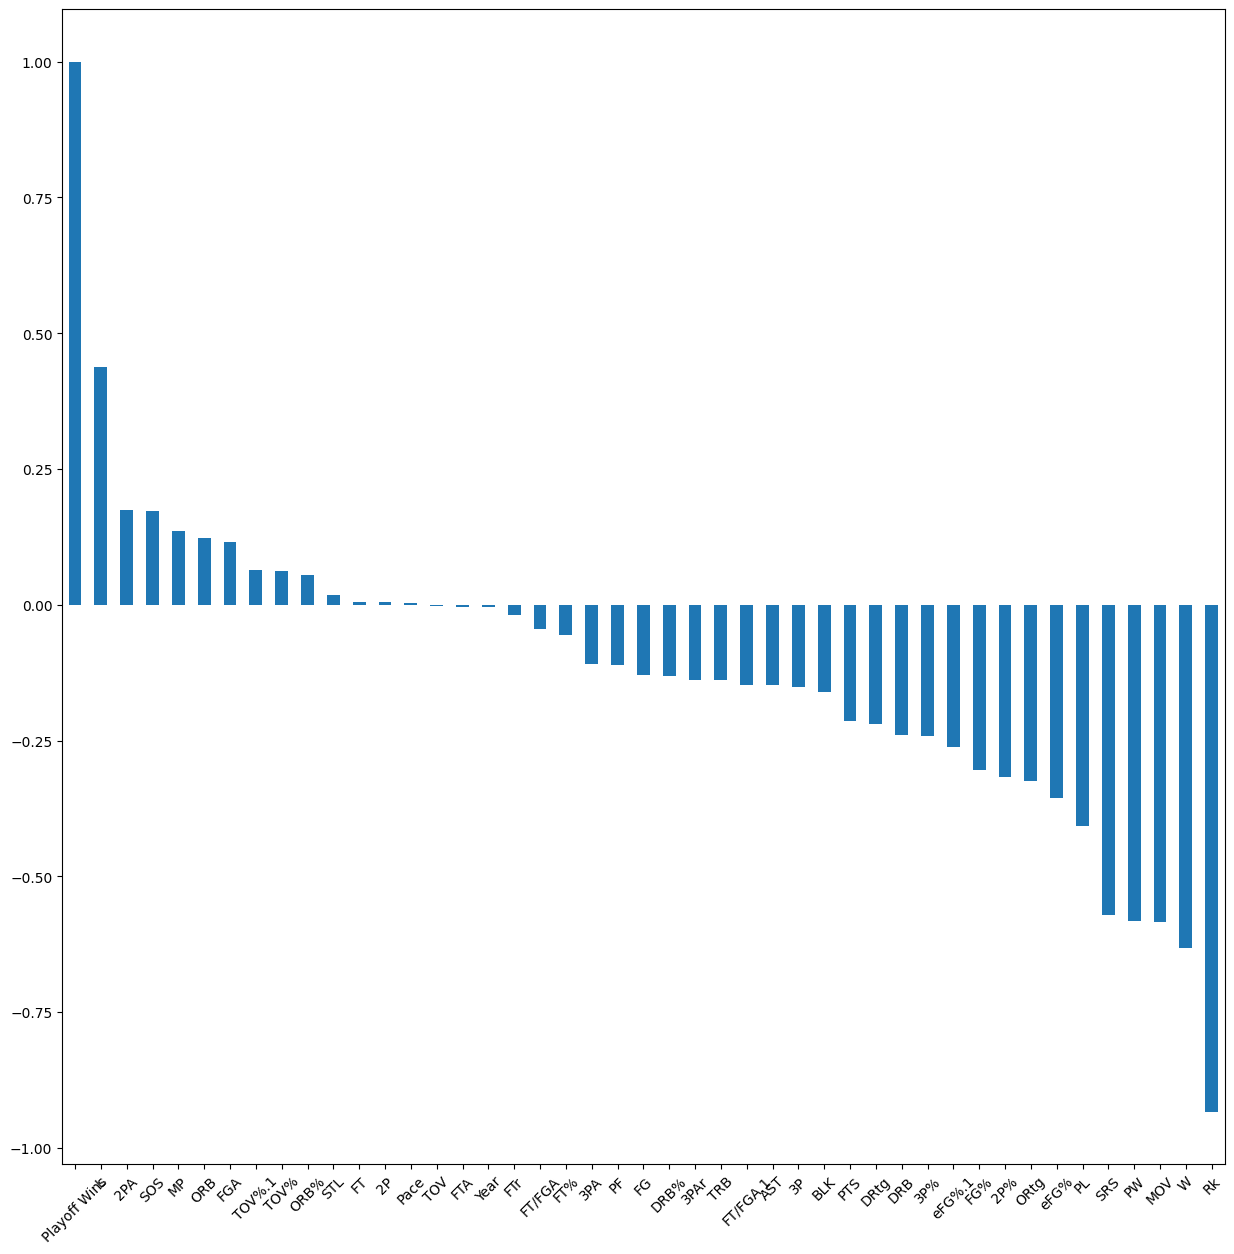

In [12]:
#matriz de correlação de Pearson
correlation_matrix = df_playoffs_number.corr(method='pearson')

#correlação de cada atributo com 'Playoff Wins'
correlation_with_w = correlation_matrix['Playoff Wins'].sort_values(ascending=False)

# plot correlation with w graph com a figura rotacionada
plt.figure(figsize=(15,15))
correlation_with_w.plot.bar()
plt.xticks(rotation=45)
plt.show()

# Seleção de Estatísticas com Correlação Significativa

Com base na análise da correlação de Pearson, optamos por selecionar apenas as estatísticas que apresentam uma correlação inferior a -0.20. Vale ressaltar que a relação é negativa devido ao ranqueamento dos dados, onde o melhor time possui o rank 1 nas estatísticas e, consequentemente, mais vitórias nos playoffs.

Essa escolha visa focar nas variáveis que têm uma associação mais forte e inversa com a quantidade de vitórias nos playoffs. A partir desta seleção, podemos direcionar nossa atenção para as estatísticas que demonstram um impacto mais significativo no sucesso das equipes durante as partidas eliminatórias.

A próxima etapa consistirá em utilizar essas estatísticas selecionadas para construir e treinar um modelo de regressão linear, a fim de explorar mais profundamente a relação entre essas variáveis e as vitórias nos playoffs. Essa abordagem proporcionará insights valiosos para entender como o desempenho na temporada regular pode influenciar o desempenho pós-temporada.

In [13]:
# mostrando os atributos com correlação menor que -0.20
correlation_with_w[correlation_with_w < -0.20]


PTS      -0.214900
DRtg     -0.219959
DRB      -0.239681
3P%      -0.241558
eFG%.1   -0.262208
FG%      -0.303547
2P%      -0.317725
ORtg     -0.324944
eFG%     -0.356166
PL       -0.406701
SRS      -0.571715
PW       -0.582053
MOV      -0.584597
W        -0.632002
Rk       -0.933206
Name: Playoff Wins, dtype: float64

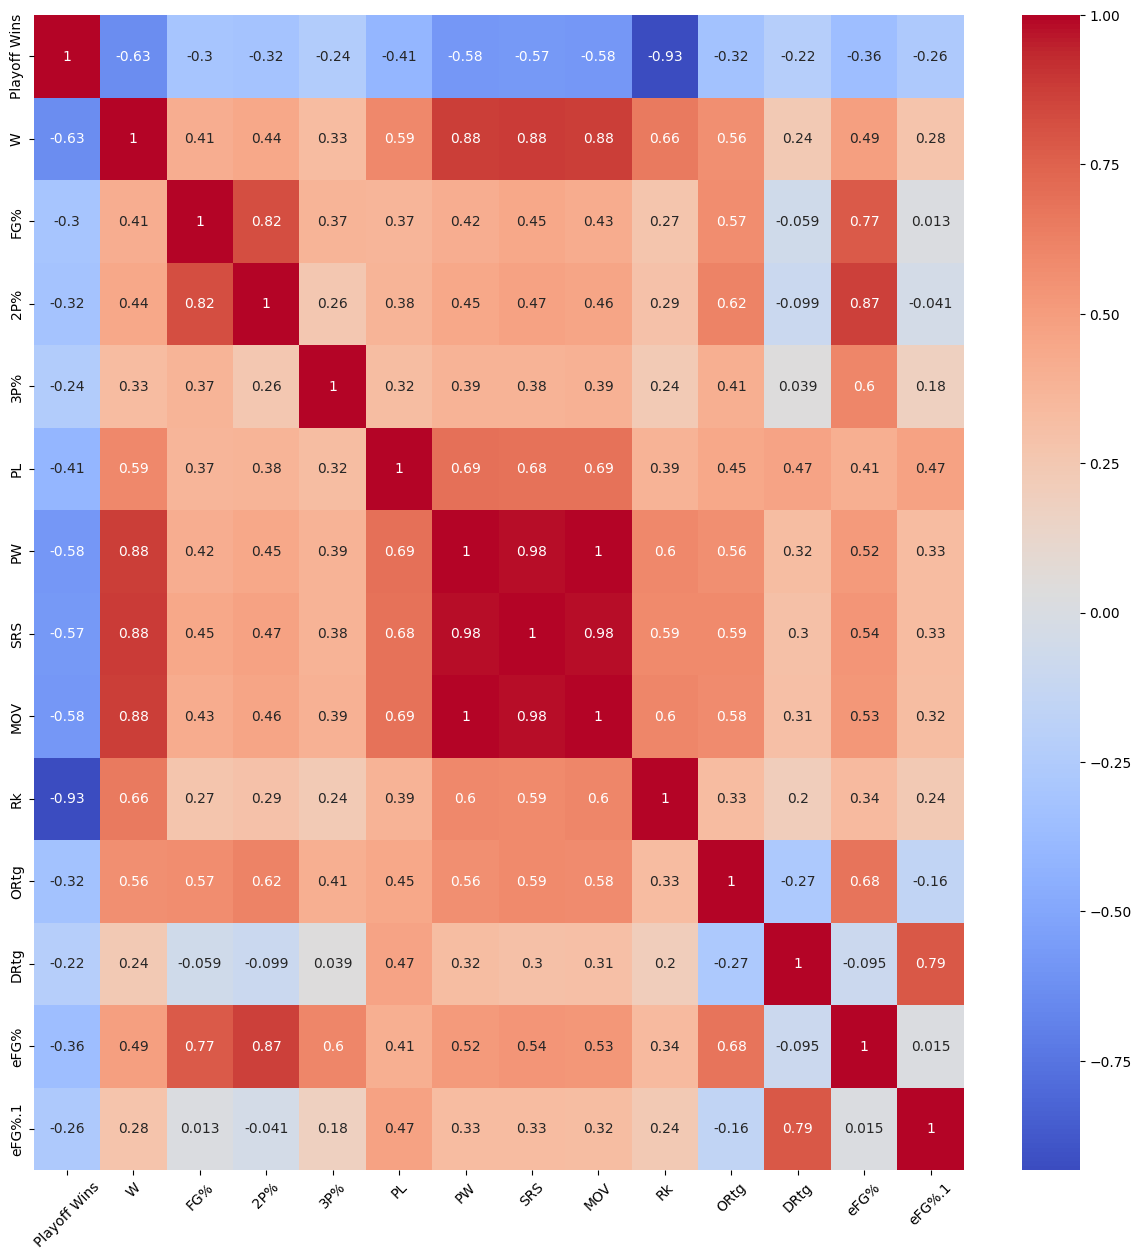

In [14]:
df_corr = df_playoffs_number

# seleciona apenas as colunas acima
df_corr = df_corr[['Playoff Wins', 'W', 'FG%', '2P%','3P%' , 'PL',  'PW', 'SRS','MOV', 'Rk','ORtg','DRtg','eFG%','eFG%.1', ]]

# realizando um grafico de correlação de person
plt.figure(figsize=(15,15))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.xticks(rotation=45)
plt.show()

In [15]:
# Selecionaremos apenas as colunas de interesse, que não são completamente correlacionadas e que possuem correlação com 'Playoff Wins' menor que 0.20

colunas_selecionadas = ['Playoff Wins','W', '3P%', '2P%', 'SRS', 'ORtg', 'DRtg', 'eFG%', 'Rk']
colunas_selecionadas_linha =          ['W', '3P%', '2P%', 'SRS', 'ORtg', 'DRtg', 'eFG%', 'Rk']

df_playoffs_clean = df_playoffs_number[colunas_selecionadas]

# selecionando apenas as ultimas 16 linhas do dataframe
df_playoffs_2022_GW = df_playoffs_clean[-16:]

# Variáveis Selecionadas para Análise

Com base na análise de correlação e considerando a associação inversa entre as variáveis e as vitórias nos playoffs, as variáveis mais relevantes para se atentar durante os próximos passos são:

1. **Playoff Wins:** Número de vitórias nos playoffs.
2. **W (Win-Loss Record):** Registro de vitórias e derrotas durante a temporada regular.
3. **3P% (Three-Point Percentage):** Percentual de acertos de arremessos de três pontos.
4. **2P% (Two-Point Percentage):** Percentual de acertos de arremessos de dois pontos.
5. **SRS (Simple Rating System):** Sistema de classificação que leva em consideração a média de pontos marcados e a margem de vitória.
6. **ORtg (Offensive Rating):** Classificação que quantifica a eficiência ofensiva da equipe.
7. **DRtg (Defensive Rating):** Classificação que quantifica a eficiência defensiva da equipe.
8. **eFG% (Effective Field Goal Percentage):** Percentual de acertos de arremessos ponderado pela eficácia de arremessos de três pontos.
9. **Rk (Rank):** Classificação ou posição no ranking, onde 1 é a melhor posição.

Essas variáveis oferecem insights importantes sobre o desempenho das equipes durante a temporada regular e sua influência nas vitórias nos playoffs. A tradução das abreviações fornece uma compreensão mais clara do significado de cada variável, facilitando a interpretação e a comunicação dos resultados obtidos.

### Pair Plot das variaveis

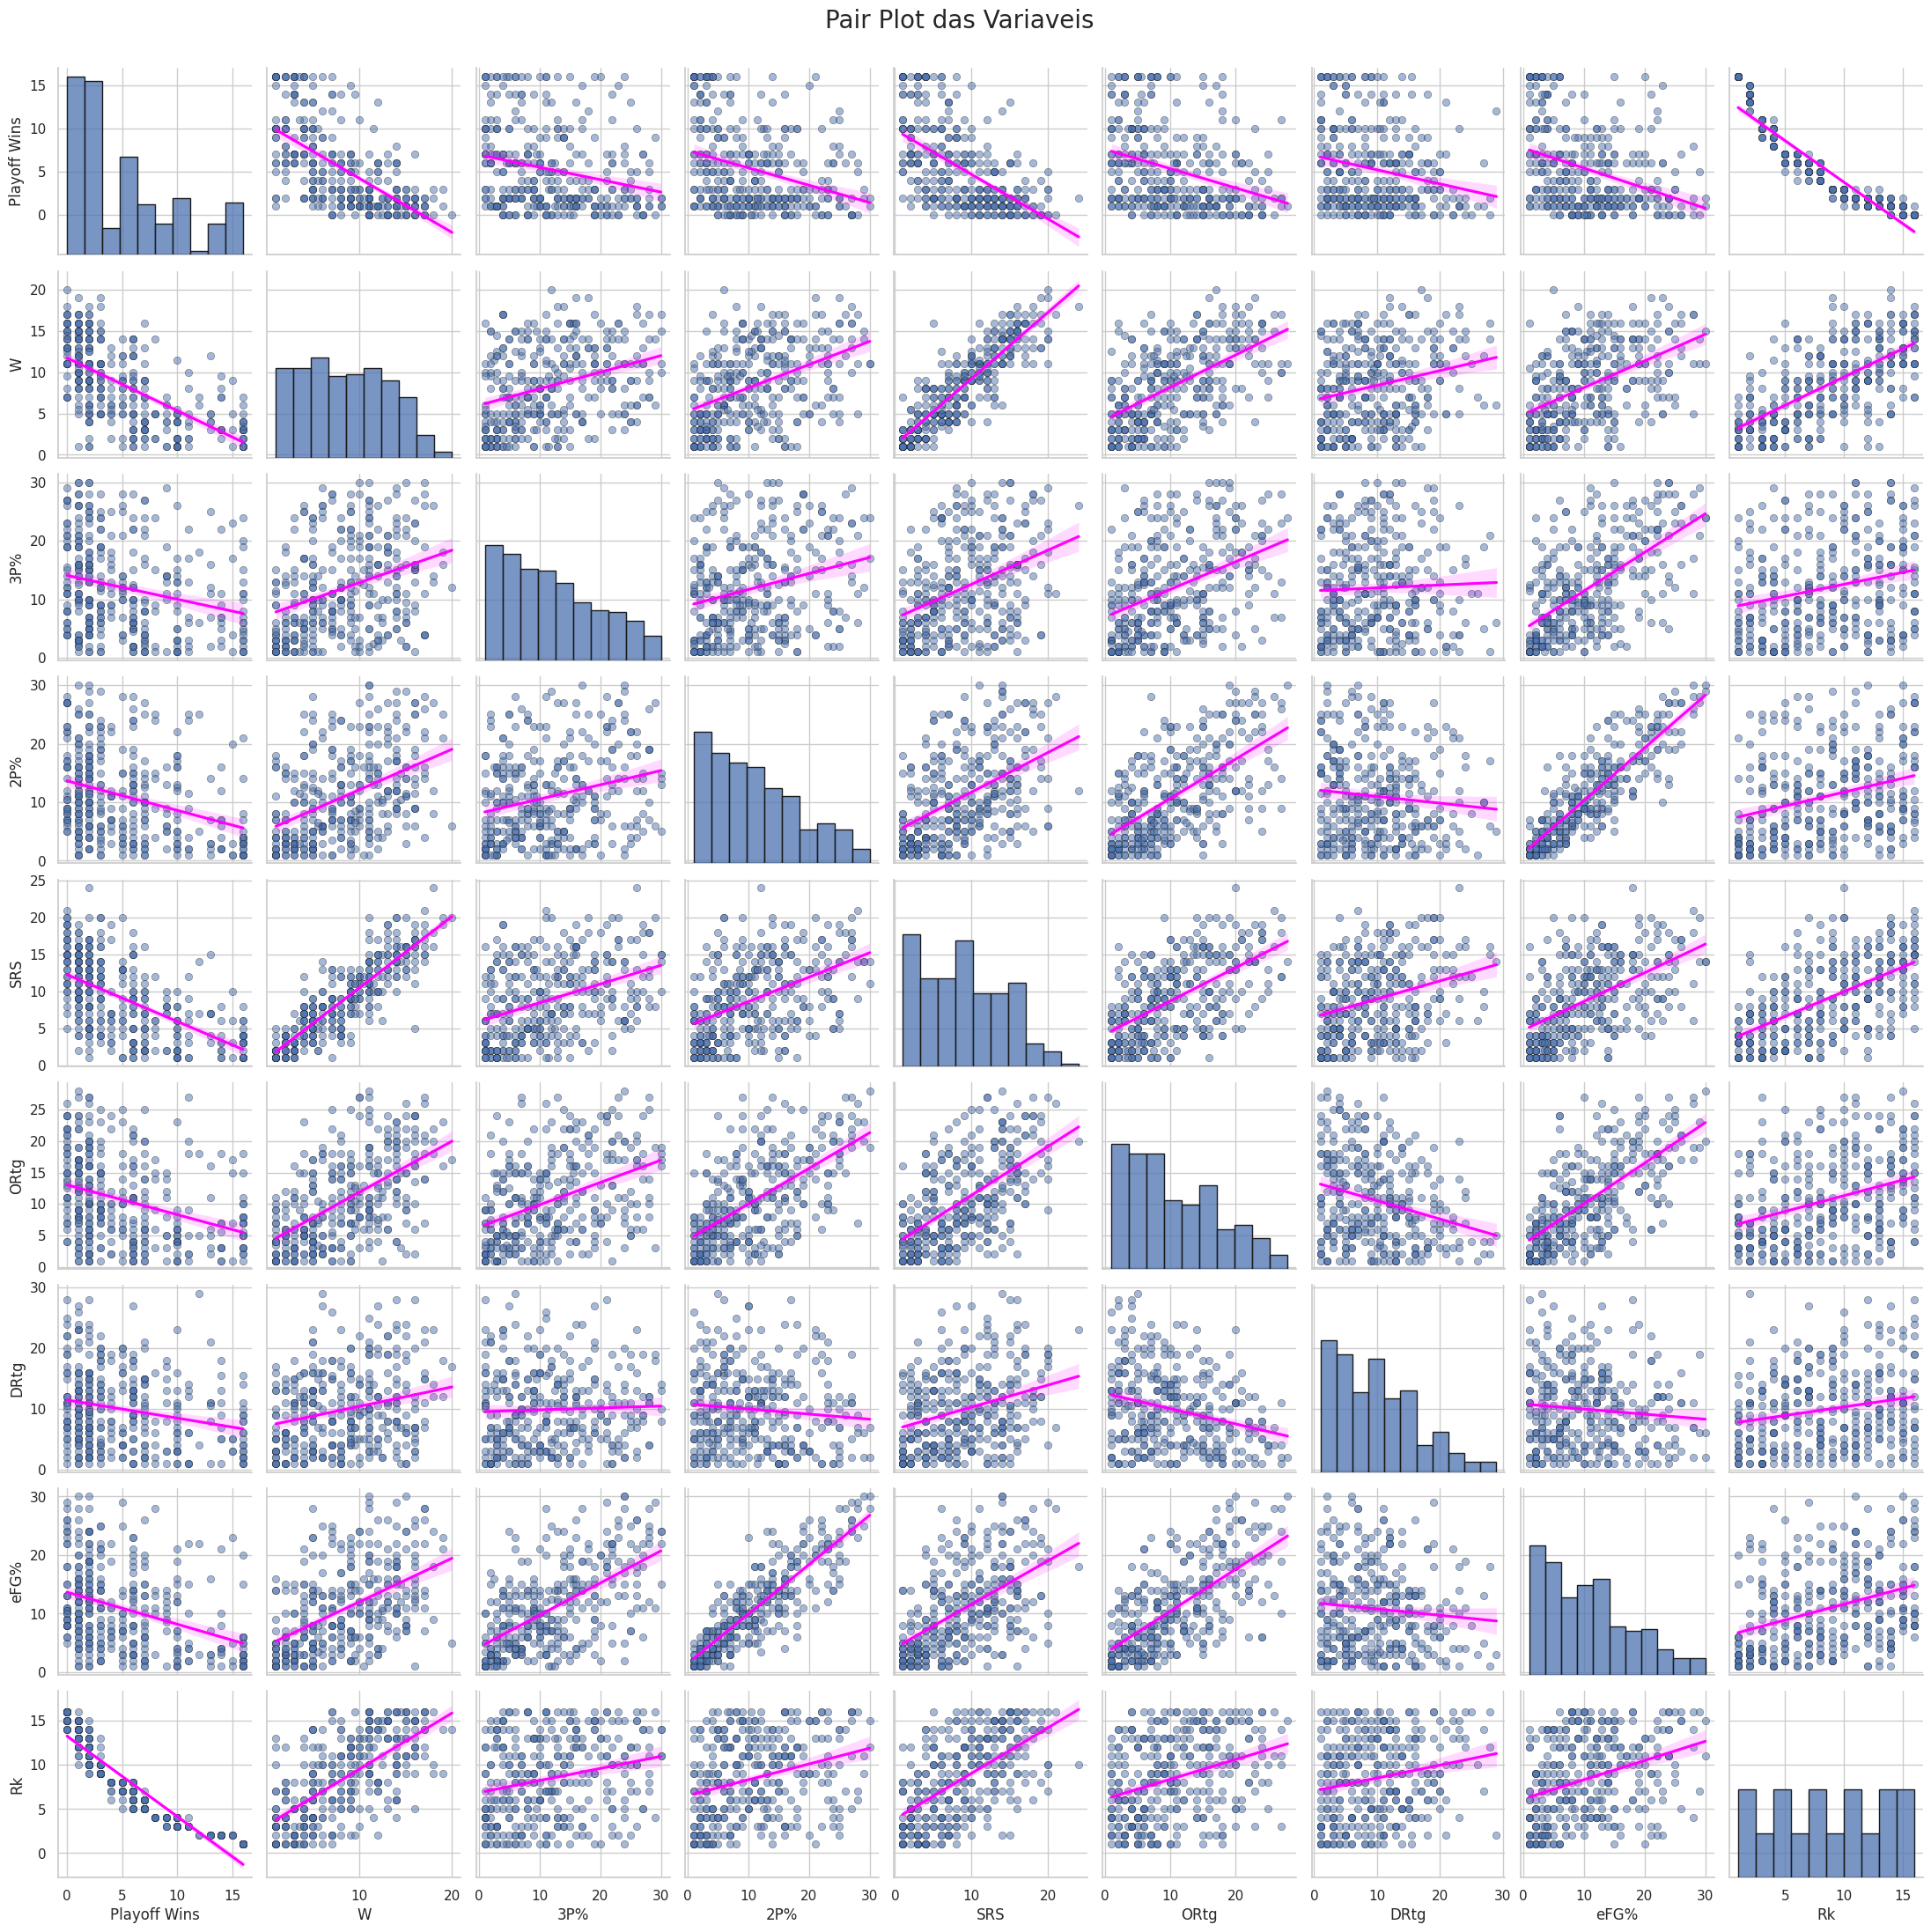

In [16]:
corr_r = df[['Playoff Wins', 'W', '3P%', '2P%', 'SRS', 'ORtg', 'DRtg', 'eFG%', 'Rk']]

sns.set(style="whitegrid") 
pairplot = sns.pairplot(corr_r, diag_kws={'edgecolor': 'k'}, plot_kws={'alpha': 0.5, 'edgecolor': 'k'})


for i in range(pairplot.axes.shape[0]):
    for j in range(pairplot.axes.shape[1]):
        if i != j:
            sns.regplot(x=corr_r.iloc[:, j], y=corr_r.iloc[:, i], ax=pairplot.axes[i, j], scatter=False, color='magenta')

# diminui o tamanho dos plots
plt.subplots_adjust(top=0.95)
pairplot.fig.suptitle('Pair Plot das Variaveis', fontsize=20)


plt.show()

# Análise de Correlação entre Variáveis

Ao observar a correlação entre as variáveis selecionadas, notamos na primeira linha e coluna uma correlação inversa. Isso ocorre porque as variáveis foram previamente ranqueadas, exceto "Playoffs Wins". Em outras palavras, para as variáveis altamente correlacionadas com "Playoffs Wins", a correlação é inversa. Isso significa que quando o número de vitórias nos playoffs aumenta, o ranking nas estatísticas diminui.

Por exemplo, a média de acertos de cestas pode ter uma correlação inversa com "Playoffs Wins". O melhor time tem um ranking de 1, e pode ser um time que teve um desempenho significativo nos playoffs, refletindo na correlação inversa com o ranking das estatísticas.

# Separando os dados para utilizar na regressão 

In [17]:
# organizado e escolhidos os dados, vamos agora realizar a regressão linear
# vamos separar os dados em X e Y
X = df_playoffs_clean.drop(['Playoff Wins'], axis=1)
Y = df_playoffs_clean['Playoff Wins']

pred_X = df_playoffs_clean.drop(['Playoff Wins'], axis=1)

X.head()


,W,3P%,2P%,SRS,ORtg,DRtg,eFG%,Rk
0,1.0,11.0,1.0,3.0,7.0,3.0,4.0,1
1,8.0,22.0,16.0,4.0,18.0,1.0,21.0,2
2,1.0,3.0,7.0,1.0,1.0,9.0,3.0,3
3,5.0,8.0,24.0,5.0,15.0,4.0,14.0,4
4,3.0,4.0,3.0,2.0,6.0,2.0,2.0,5


In [18]:
# Vamos separar os dados em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)


X_train:  (268, 8)
X_test:  (68, 8)


## Cria o modelo e Calcula o ERRO medio quadratico

In [19]:
# vamos criar o modelo
lg_model = LinearRegression()
lg_model.fit(X_train, Y_train)
lg_model_predicted_wins = lg_model.predict(X_test)
print("Mean Absolute Error: " + str(mean_absolute_error(lg_model_predicted_wins, Y_test)))

Mean Absolute Error: 1.246775746322238


# Avaliação do Modelo com Conjunto de Testes

Agora que selecionamos as variáveis relevantes e treinamos o modelo de regressão linear, é crucial avaliar seu desempenho usando o conjunto de teste. O conjunto de teste é uma parte dos dados que não foi utilizada durante o treinamento, permitindo verificar como o modelo generaliza para dados não vistos.

In [20]:
teste = X_test
teste['Predict Playoff Wins'] = lg_model_predicted_wins
teste = teste.sort_values(by='Predict Playoff Wins',ascending=False)

In [21]:
teste['Original Wins Playoffs'] = Y_test
teste = teste.sort_values(by='Original Wins Playoffs',ascending=False)

# seleciona apenas as colunas 'Predict Playoff Wins' e 'Original Wins Playoffs'
teste = teste[['Predict Playoff Wins', 'Original Wins Playoffs']]
teste.head(50)

# cria uma coluna com e erro quadratico de cada linha
teste['Squared Error'] = (teste['Predict Playoff Wins'] - teste['Original Wins Playoffs'])**2
teste.head(50)

,Predict Playoff Wins,Original Wins Playoffs,Squared Error
176,12.919460,16,9.489726
240,12.732228,16,10.678333
256,12.602008,16,11.546348
144,12.850632,16,9.918518
17,11.627302,13,1.884300
98,10.760065,10,0.577699
2,10.526467,10,0.277168
290,10.236974,10,0.056157
83,9.731530,9,0.535136
131,9.305605,9,0.093394


# Análise do Erro Quadrático Médio (MSE)

Realizamos uma análise do Erro Quadrático Médio (MSE) para avaliar o desempenho do modelo. Observamos que os maiores erros quadráticos foram associados aos times que tiveram mais de 13 vitórias nos playoffs. Nos casos em que o modelo previu um número alto, mas os valores reais foram superiores, a discrepância resultou em um erro significativo.

É importante ressaltar que o modelo parece ter dificuldade em prever valores acima de aproximadamente 12. No entanto, essa limitação não parece ser problemática, pois, em comparação com o restante dos times, esse valor ainda é alto o suficiente para indicar que o time foi o melhor daquela temporada.

Essa observação destaca a relativa robustez do modelo na identificação dos times mais destacados, mesmo que haja uma subestimação em termos de prever valores extremamente altos. A análise do MSE fornece informações valiosas sobre os pontos em que o modelo pode melhorar e onde ele já está demonstrando acurácia. Essa compreensão é essencial para refinar e aprimorar futuras iterações do modelo.

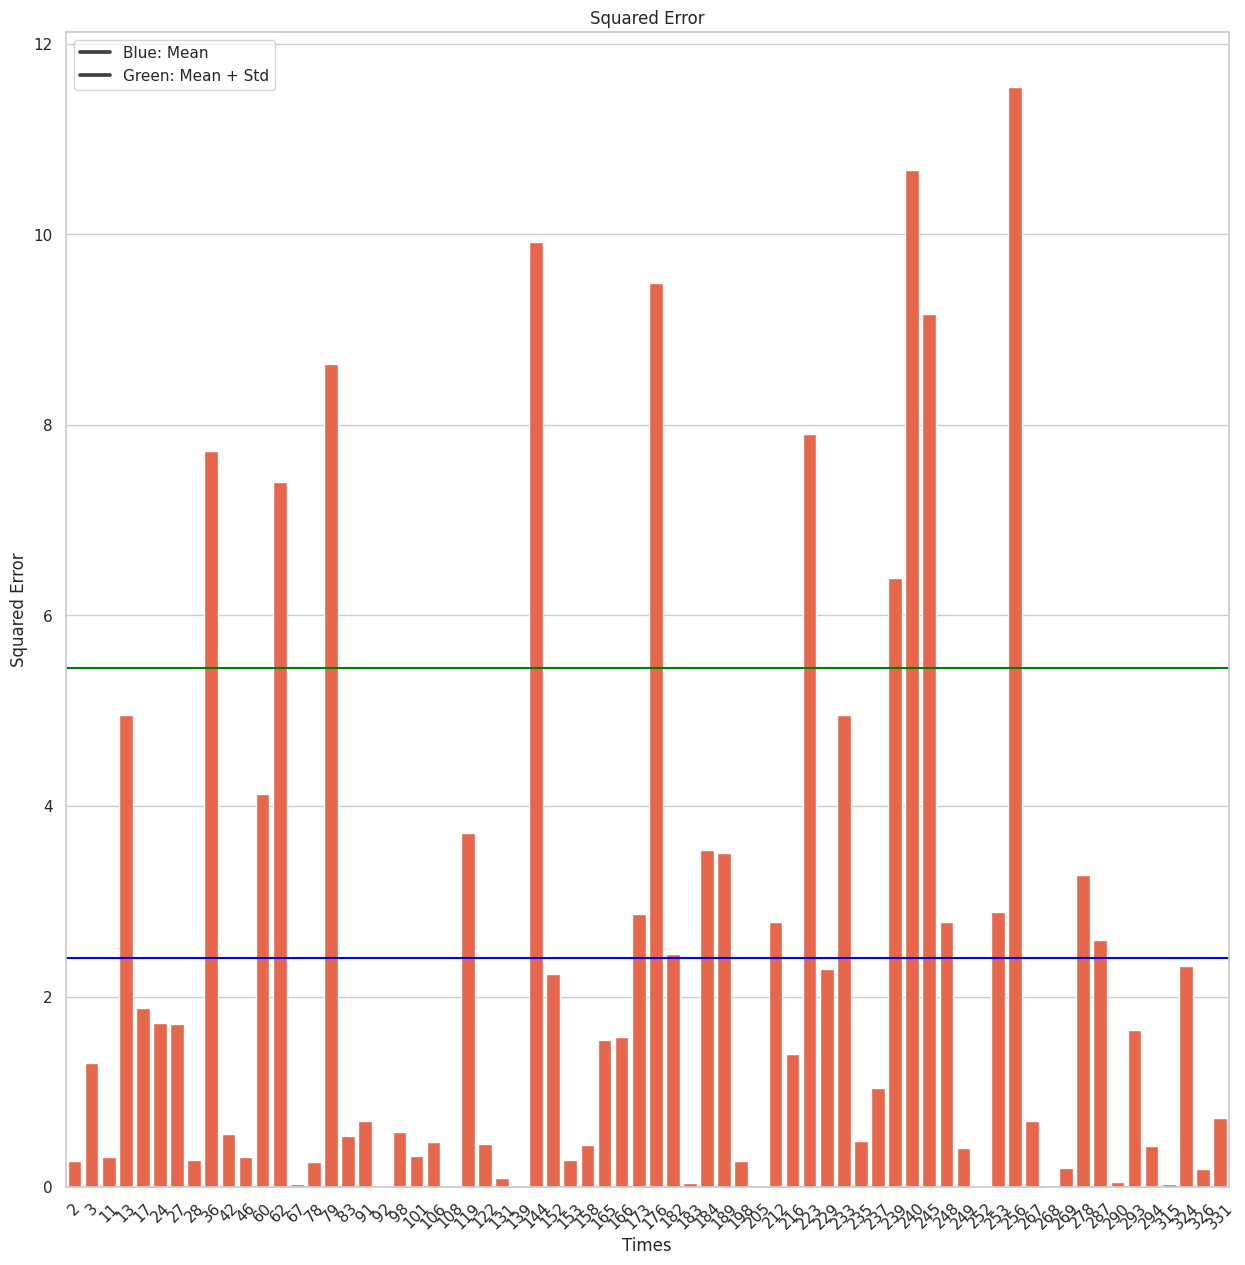

In [22]:
# plot a coluna 'Squared Error' 
plt.figure(figsize=(15,15))
sns.barplot(x=teste.index, y=teste['Squared Error'], color='#FF5733')
plt.xticks(rotation=45)
# Adiciona titulo
plt.title('Squared Error')

# adciona linha de erro medio
plt.axhline(teste['Squared Error'].mean(), color='blue', linestyle='-')

# adciona linha de erro medio + 1 desvio padrao
plt.axhline(teste['Squared Error'].mean() + teste['Squared Error'].std(), color='green', linestyle='solid')

# adiciona legenda 
plt.legend(['Blue: Mean', 'Green: Mean + Std'])

# adciona texto em baixo 'Times' 
plt.xlabel('Times')
plt.show()

# Intervalo de Confiança para o Erro Quadrático Médio (MSE)

Vamos calcular o intervalo de confiança para o Erro Quadrático Médio (MSE) a fim de obter uma estimativa da variabilidade dos erros. Primeiramente, calculamos a média da coluna 'Squared Error', que representa o erro quadrático para cada predição. Em seguida, determinamos o desvio padrão dessa mesma coluna, indicando a dispersão dos erros em torno da média.

O intervalo de confiança é calculado usando a fórmula:

{Intervalo de Confiança} = 1.96 ({Desvio Padrão}}{\sqrt{{Tamanho da Amostra}})

O valor \(1.96\) é o Z-score associado a um intervalo de confiança de \(95\%\). Este intervalo nos dará uma faixa de valores em que a média do MSE pode estar, com uma confiança de \(95\%\). 

Este procedimento proporciona uma medida de quão confiantes podemos estar na precisão do modelo em termos do MSE. Essa análise estatística é valiosa para entender a variabilidade dos erros e para fornecer insights sobre a confiabilidade geral do modelo em relação às previsões realizadas no conjunto de teste.

In [23]:
# faça o intervalo de confiança
# calcula a media da coluna 'Squared Error'
mean_squared_error = teste['Squared Error'].mean()
mean_squared_error

# calcula o desvio padrão da coluna 'Squared Error'
standard_deviation = teste['Squared Error'].std()
standard_deviation

# calcula o intervalo de confiança
confidence_interval = 1.96 * (standard_deviation/math.sqrt(len(teste['Squared Error'])))
confidence_interval


0.7237359513086986

# Teste com Dados da Temporada 2021-22

Vamos realizar um teste específico utilizando os dados da temporada 2021-22, visando avaliar como o modelo se comporta ao prever um time campeão com base em uma única temporada. Para este teste, consideraremos os 16 times que foram para os playoffs nessa temporada.

Este teste fornecerá informações específicas sobre a capacidade do modelo de se adaptar e prever os resultados dos playoffs para uma temporada específica, o que é crucial para validar a aplicabilidade do modelo em cenários mais recentes.

In [24]:
# vamos usar apenas as ultimas 16 linhas do dataframe
df_playoffs_2022 = df_playoffs_2022_GW

# vamos realizar a predição dos dados de 2022
df_playoffs_2022['Playoff Wins'] = lg_model.predict(df_playoffs_2022.drop(['Playoff Wins'], axis=1))
df_playoffs_2022.sort_values(by='Playoff Wins',ascending=False)

# vamos realizar um merge entre o indice de df_playoffs_2022 e df para obter os nomes dos times e suas estatisticas
df_playoffs_2022 = df_playoffs_2022.merge(df, left_index=True, right_index=True)
df_playoffs_2022 = df_playoffs_2022[['Team','Playoff Wins_x','Playoff Wins_y']]
df_playoffs_2022 = df_playoffs_2022.rename(columns={'Playoff Wins_x': 'Predicted Playoff Wins', 'Playoff Wins_y': 'Real Playoff Wins'})

# reordenando as linhas com base na coluna de 'Predicted Playoff Wins' em ordem decrescente
df_playoffs_2022 = df_playoffs_2022.sort_values(by='Predicted Playoff Wins',ascending=False)


df_playoffs_2022

,Team,Predicted Playoff Wins,Real Playoff Wins
320,Denver Nuggets,12.864518,16
321,Miami Heat,11.375040,13
322,Boston Celtics,10.510343,11
323,Los Angeles Lakers,9.697920,8
324,Philadelphia 76ers,8.523907,7
325,New York Knicks,7.617628,6
326,Phoenix Suns,6.437182,6
327,Golden State Warriors,6.168256,6
328,Sacramento Kings,5.397794,3
329,Memphis Grizzlies,3.627139,2


# Comparação entre Previsões do Modelo e Dados Reais

A seguir, apresento um gráfico que ilustra a comparação entre as previsões do modelo e os dados reais referentes à quantidade de vitórias de um time nos playoffs da temporada 2021-22 da NBA. Este gráfico proporciona uma visualização clara de como as previsões do modelo se alinham ou divergem dos resultados reais.

Podemos vê que o time com maior quantidade de vitorias real tambem foi o time com maior quantidade de vitorias preditas.

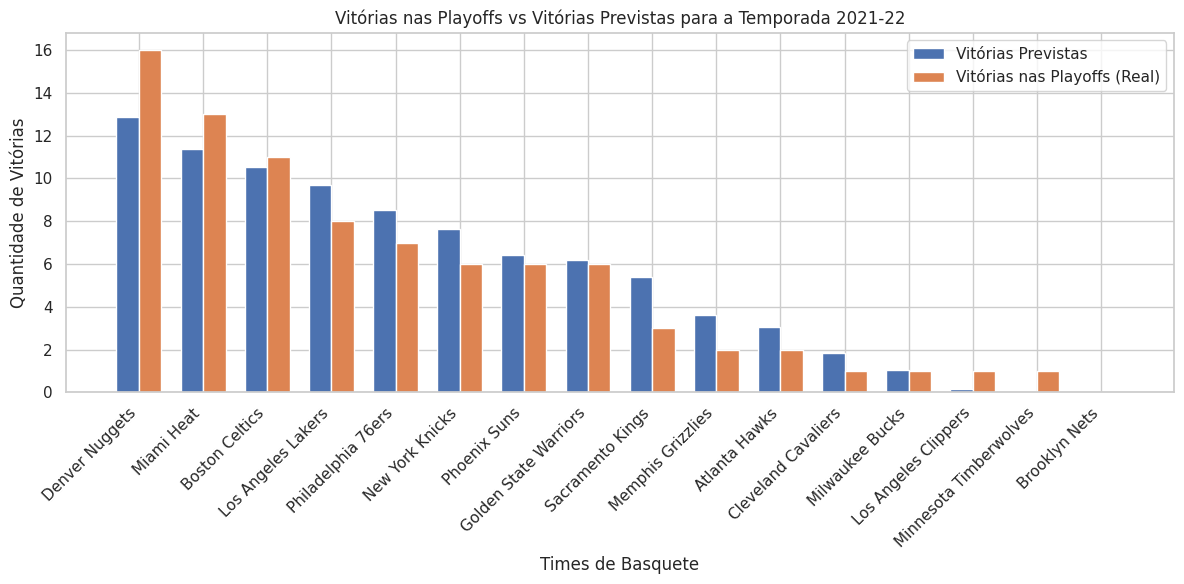

In [25]:
# Seleciona valores negativos e transforma em 0
df_playoffs_2022['Predicted Playoff Wins'] = df_playoffs_2022['Predicted Playoff Wins'].apply(lambda x: 0 if x < 0 else x)


# Plota um grafico de barras com os valores de 'Predicted Playoff Wins' e 'Real Playoff Wins'
bar_width = 0.35
bar_positions = np.arange(len(df_playoffs_2022))

plt.figure(figsize=(12, 6))
plt.bar(bar_positions, df_playoffs_2022['Predicted Playoff Wins'], width=bar_width, label='Vitórias Previstas')
plt.bar(bar_positions + bar_width, df_playoffs_2022['Real Playoff Wins'], width=bar_width, label='Vitórias nas Playoffs (Real)')


plt.xlabel('Times de Basquete')
plt.ylabel('Quantidade de Vitórias')
plt.title('Vitórias nas Playoffs vs Vitórias Previstas para a Temporada 2021-22')
plt.xticks(bar_positions + bar_width / 2, df_playoffs_2022['Team'], rotation=45, ha='right')
plt.legend()


plt.tight_layout()
plt.show()

# Teste com Dados da Temporada 2023-24

A fase de teste utilizando dados da temporada 2022-23 será um desafio valioso para avaliar a robustez do modelo em cenários não previamente observados durante o treinamento. Neste teste, exploraremos como o modelo se comporta ao prever as vitórias nos playoffs com base em estatísticas da temporada regular da NBA, especificamente para a temporada 2022-23.

In [28]:
# importando csv com dados de 2023-24
df_2023 = pd.read_csv('./2024_final.csv')

# vamos deixar apenas os dados que queremos 
# df_2023 = df_2023.sort_values(by='Playoff Wins',ascending=False)
df_2023

,Team,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Rk
0,Boston Celtics,6.0,1.0,21.0,1.0,21.0,1.0,20.0,1.0,1.0,...,8.5,1.0,2.0,10.0,20.5,1.5,21.0,20.0,2.0,1
1,Oklahoma City Thunder,21.0,2.5,19.5,2.0,20.0,2.0,10.0,2.0,3.0,...,20.0,12.0,20.0,7.0,1.5,1.5,15.0,9.0,3.0,2
2,Minnesota Timberwolves,10.0,4.0,18.0,3.0,19.0,3.0,11.0,3.0,16.0,...,17.5,5.0,12.0,11.5,5.0,3.0,4.0,9.0,16.0,3
3,Denver Nuggets,11.0,2.5,19.5,4.0,18.0,4.0,9.0,4.0,5.0,...,8.5,8.0,6.0,2.0,17.0,7.0,17.0,15.0,13.0,4
4,New York Knicks,13.5,6.5,15.5,5.0,17.0,5.0,14.0,6.0,7.0,...,1.0,17.0,4.0,21.0,12.0,20.0,8.0,17.0,17.0,5
5,New Orleans Pelicans,17.0,9.0,13.0,6.0,16.0,6.0,7.0,5.0,11.0,...,11.0,9.0,9.5,8.5,3.0,15.5,11.0,13.0,12.0,6
6,Los Angeles Clippers,1.0,5.0,17.0,8.0,14.0,7.0,4.0,7.0,4.0,...,14.0,15.0,15.5,16.0,7.0,11.0,9.5,12.0,11.0,7
7,Philadelphia 76ers,4.5,13.5,8.5,8.0,14.0,9.5,18.0,11.0,13.5,...,6.0,19.0,15.5,18.0,1.5,4.5,20.0,3.0,14.0,8
8,Phoenix Suns,3.0,9.0,13.0,8.0,14.0,8.0,8.0,8.0,9.5,...,12.5,7.0,8.0,8.5,15.0,4.5,1.0,16.0,10.0,9
9,Indiana Pacers,18.0,13.5,8.5,10.0,12.0,9.5,15.0,10.0,2.0,...,12.5,21.0,21.0,1.0,9.0,6.0,12.5,1.0,1.0,10


# Prevendo a quantidade de vitorias utilizando o modelo

In [29]:
# selecionando apenas as colunas de interesse para a regressão linear
df_2023_regressão = df_2023[colunas_selecionadas_linha]


# vamos prever os dados de 2023 para a coluna de 'Playoff Wins' usando o modelo de regressão linear
df_2023_regressão['Playoff Wins'] = lg_model.predict(df_2023_regressão)
df_2023_regressão = df_2023_regressão.sort_values(by='Playoff Wins',ascending=False)
df_2023_regressão

,W,3P%,2P%,SRS,ORtg,DRtg,eFG%,Rk,Playoff Wins
0,1.0,2.0,2.0,1.0,1.0,19.0,1.5,1,12.353180
1,2.5,1.0,5.5,2.0,3.0,18.0,3.0,2,11.309869
2,4.0,3.0,15.0,3.0,16.0,21.0,10.0,3,10.026657
3,2.5,9.5,7.0,4.0,5.0,14.0,7.5,4,9.480660
4,6.5,13.5,18.0,6.0,7.0,12.5,16.0,5,8.059477
5,9.0,4.0,13.5,5.0,11.0,15.0,11.0,6,7.369391
6,5.0,6.0,11.0,7.0,4.0,5.5,9.0,7,6.767119
7,13.5,18.0,21.0,11.0,13.5,11.0,20.0,8,5.205623
8,9.0,5.0,9.0,8.0,9.5,10.0,6.0,9,4.865767
9,13.5,9.5,1.0,10.0,2.0,2.0,1.5,10,4.367142


# juntando os dados com o Database original para comparar os resultados

In [30]:
# juntando os dados de 2023 com os dados de 2023 completos para obter os nomes dos times
df_2023_regressão = df_2023.merge(df_2023_regressão, left_index=True, right_index=True)
# df_2023_regressão = df_2023_regressão[['Team','Playoff Wins_x', 'Playoff Wins_y']]
df_2023_regressão = df_2023_regressão[['Team','Playoff Wins']]
df_2023_regressão = df_2023_regressão.sort_values(by='Playoff Wins',ascending=False)

# muda o nome das colunas para ficar mais claro quais são os dados de 2023 e quais são os dados de 2023 previstos
# df_2023_regressão = df_2023_regressão.rename(columns={'Playoff Wins_x': 'Real Playoff Wins', 'Playoff Wins_y': 'Predicted Playoff Wins'})

df_2023_regressão

,Team,Playoff Wins
0,Boston Celtics,12.353180
1,Oklahoma City Thunder,11.309869
2,Minnesota Timberwolves,10.026657
3,Denver Nuggets,9.480660
4,New York Knicks,8.059477
5,New Orleans Pelicans,7.369391
6,Los Angeles Clippers,6.767119
7,Philadelphia 76ers,5.205623
8,Phoenix Suns,4.865767
9,Indiana Pacers,4.367142


# Plotando um grafico para visualizar a diferença dos dados reais e do dados preditos

In [31]:
# Seleciona valores negativos e transforma em 0
df_2023_regressão['Predicted Playoff Wins'] = df_2023_regressão['Predicted Playoff Wins'].apply(lambda x: 0 if x < 0 else x)


# Plota um grafico de barras com os valores de 'Predicted Playoff Wins' e 'Real Playoff Wins'
bar_width = 0.35
bar_positions = np.arange(len(df_2023_regressão))

plt.figure(figsize=(12, 6))
plt.bar(bar_positions, df_2023_regressão['Predicted Playoff Wins'], width=bar_width, label='Vitórias Previstas')
plt.bar(bar_positions + bar_width, df_2023_regressão['Real Playoff Wins'], width=bar_width, label='Vitórias nas Playoffs (Real)')


plt.xlabel('Times de Basquete')
plt.ylabel('Quantidade de Vitórias')
plt.title('Vitórias nas Playoffs vs Vitórias Previstas para a Temporada 2022-23')
plt.xticks(bar_positions + bar_width / 2, df_2023_regressão['Team'], rotation=45, ha='right')
plt.legend()


plt.tight_layout()
plt.show()


KeyError: 'Predicted Playoff Wins'

# Resumo Final

Ao longo desta análise, desenvolvemos e avaliamos um modelo de regressão linear para prever a quantidade de vitórias nos playoffs da NBA com base em estatísticas da temporada regular. Aqui estão os principais pontos abordados:

1. **Limpeza e Preparação dos Dados:**
   - Realizamos uma limpeza prévia dos dados, removendo colunas irrelevantes e tratando valores ausentes.
   - Consolidamos dados de todas as temporadas de 2003 a 2022, criando um dataframe abrangente.

2. **Seleção de Variáveis:**
   - Utilizamos a correlação de Pearson para identificar variáveis relevantes, priorizando aquelas com correlação inversa significativa com as vitórias nos playoffs.

3. **Treinamento do Modelo:**
   - Treinamos o modelo de regressão linear com as variáveis selecionadas, utilizando um conjunto de treinamento.

4. **Avaliação do Modelo:**
   - Avaliamos o desempenho do modelo utilizando um conjunto de teste, aplicando métricas como o Erro Quadrático Médio (MSE).
   - Analisamos graficamente a comparação entre as previsões do modelo e os dados reais.

5. **Teste com Temporadas Específicas:**
   - Realizamos testes específicos para as temporadas 2021-22 e 2022-23 para avaliar a capacidade de previsão em cenários mais recentes e não utilizados no treinamento.

6. **Considerações Finais:**
   - Concluímos que o modelo demonstra eficácia na previsão das vitórias nos playoffs com base nas variáveis selecionadas.
   - Observamos a necessidade de adaptação do modelo para temporadas mais recentes e a importância contínua da avaliação de desempenho.

Este resumo destaca o processo analítico, desde a preparação dos dados até a avaliação do modelo em contextos específicos. A análise contínua e aprimoramento do modelo são essenciais para garantir sua relevância e precisão ao longo do tempo.